# Data Exploration

Here we will learn about how to look at different datasets and generate meaningful insights into the structure of those datasets. As a first step we should import a set of training data to play around with. 

In [1]:
using DataSci4Chem

data = dataset("datasets", "iris")
data[1:5,:]

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## E1: 

What are the variables and their types in this dataset?

> **Answers to E1**
> 
> There are in total five variables of which four are Float64 and one is categorical. There are in total 150 measurements included in this dataset.
>

In [62]:
size(data)

(150, 5)

## E2: 

For numerical variables, what are the mean and median of each variable?

In [2]:
data_m = Matrix(data[:,1:4])
a_data = mean(data_m, dims = 1)

1×4 Matrix{Float64}:
 5.84333  3.05733  3.758  1.19933

In [3]:
med_data = median(data_m, dims = 1)

1×4 Matrix{Float64}:
 5.8  3.0  4.35  1.3

## E3:

What could having similar mean and median represent? 

> **Answers to E3**
> 
> This could potentially mean that we are working with normal distributions. 
>

## E4: 

How can we verify this hypothesis? (Hint: visualization)

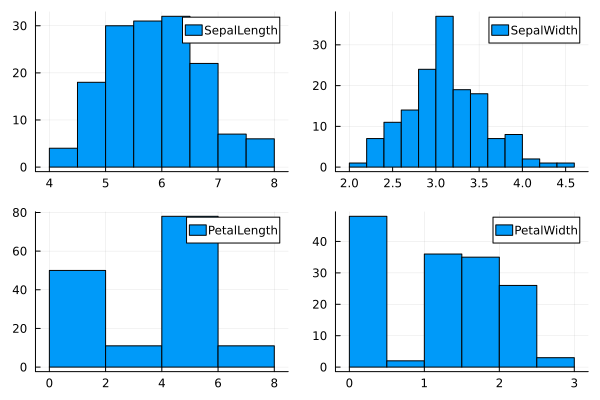

In [4]:
p1 = histogram(data_m[:,1],label = "SepalLength")
p2 = histogram(data_m[:,2],label = "SepalWidth")
p3 = histogram(data_m[:,3], label = "PetalLength")
p4 = histogram(data_m[:,4], label = "PetalWidth")

plot(p1,p2,p3,p4)


## E5: 

What is the range of values for the four numerical variables?

In [66]:
minimum(data_m,dims = 1)

1×4 Matrix{Float64}:
 4.3  2.0  1.0  0.1

In [67]:
maximum(data_m,dims = 1)

1×4 Matrix{Float64}:
 7.9  4.4  6.9  2.5

## E6: 

Write a function to calculate the mean, median, minimum, maximum, and standard deviation for a matrix.

In [6]:
function var_range(mat)
    min_ = minimum(mat,dims = 1)
    mx = maximum(mat,dims = 1)
    av = mean(mat, dims = 1)
    med = median(mat, dims = 1)
    sdev = std(mat, dims = 1)
    return(min_,mx,av,med,sdev)
end 

min_,mx,av,med,sdev = var_range(data_m)

([4.3 2.0 1.0 0.1], [7.9 4.4 6.9 2.5], [5.843333333333334 3.0573333333333337 3.7580000000000005 1.1993333333333336], [5.8 3.0 4.35 1.3], [0.828066127977863 0.43586628493669827 1.7652982332594664 0.7622376689603466])

## E7: 
What about the categorical variable? What is in it? 

In [69]:
unique(data[!,"Species"])

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

## E8: 

Is there a way to get all this information, directly, from the dataframe? 

> **Answer to E8**
> 
> You can use the function *describe(-)* for that.
> 

In [70]:
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


## E9: 

1. What are "missing" values? 
2. What is "NaN"? 


> **Answer to E9** 
>
> 1. The ["missing"](https://docs.julialang.org/en/v1/manual/missing/) represents the missing values in large datasets. You can also see them as padding to generate properly shaped matrices during the data import.
> 2. The ["NaN"](https://docs.julialang.org/en/v1/base/numbers/#Base.NaN) stands for not a number. You can use NaN in different occasions from plotting to modeling. 
>
> 

## E10:

Generate a vector of 5 random data points. Create two copies of this variable (hint: use the function *deepcopy(-)*). Replace the third entry with missing and NaN in those matrices, respectively. 

In [7]:
tv = rand(5)

5-element Vector{Float64}:
 0.34812171823664273
 0.4421289648892712
 0.24935811040942002
 0.19948356578566662
 0.20560260557828003

In [8]:
a = deepcopy(tv)
b = deepcopy(tv)

5-element Vector{Float64}:
 0.34812171823664273
 0.4421289648892712
 0.24935811040942002
 0.19948356578566662
 0.20560260557828003

In [9]:
a[3] = NaN 

a 

5-element Vector{Float64}:
   0.34812171823664273
   0.4421289648892712
 NaN
   0.19948356578566662
   0.20560260557828003

In [10]:
b[3] = missing 

b

LoadError: MethodError: [0mCannot `convert` an object of type [92mMissing[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::VectorizationBase.AbstractSIMD[39m) where T<:Union{Bool, Float16, Float32, Float64, Int16, Int32, Int64, Int8, UInt16, UInt32, UInt64, UInt8, SIMDTypes.Bit} at /Users/saersamanipour/.julia/packages/VectorizationBase/0dXyA/src/base_defs.jl:201
[0m  convert(::Type{S}, [91m::CategoricalArrays.CategoricalValue[39m) where S<:Union{AbstractChar, AbstractString, Number} at /Users/saersamanipour/.julia/packages/CategoricalArrays/0yLZN/src/value.jl:92
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:250
[0m  ...

## E11: 

How can you create a vector with a missing value in it? 

In [14]:
b1 = Array{Any}(undef,1,5)
b1[1,[1,2,4,5]] .= b[[1,2,4,5]]
#b1[1,3]
b1[1,3] = missing 
b1 

1×5 Matrix{Any}:
 0.348122  0.442129  missing  0.199484  0.205603

## E12: 

Let's calculate the mean, standard deviation, and median of the two vectors.  

In [76]:
mean(a)

NaN

In [77]:
mean(b1)

missing

> **Answer to E12** 
>
> You will see similar outputs for other functions. 
> 

## E13: 

How can we select the elements in the vector/matrix that are not missing or NaN? 

> **Answer to E13**
>
> You can use the base functions *isnan(-)* and *ismissing(-)* for this task.
> 

In [78]:
a[isnan.(a) .== 0]

4-element Vector{Float64}:
 0.45133800135865143
 0.7559565593479183
 0.6033128323739259
 0.40758449100619165

In [79]:
b1[ismissing.(b1) .== 0]

4-element Vector{Any}:
 0.45133800135865143
 0.7559565593479183
 0.6033128323739259
 0.40758449100619165

## E14: 

Write a function to generate an output similar to the function *describe(-)*. 

Now that we know how to select the missing values, we need to replace them with an appropriate value. 

## E15: 

What are the most common options for data [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics))?

> **Answer to E15**
>
> There are several ways to perform data imputation. The most commonly used ones are removal, hot-deck, mean replacement, and regression.

**Hot-Deck** approach assumes that you can replace the missing value with the closest value to the missing value. To do so, you need to first find the location of the missing value. Then sort your data without the missing value. Finally the first value smaller than the missing value is used as the replacement. 

## E16: 

How can we locate the index of missing value?

In [80]:
findall(isnan.(a) .== 1)

1-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 3)

## E17: 

How can we sort our data in ascending order?

In [81]:
a_sort = sort(a[isnan.(a) .== 0])

4-element Vector{Float64}:
 0.40758449100619165
 0.45133800135865143
 0.6033128323739259
 0.7559565593479183

## E18: 

What is the value that should be selected for the replacement and how the imputed a look?

In [82]:
a_imp = deepcopy(a)
a_imp[3] = a_sort[2]
a_imp 

1×5 Matrix{Float64}:
 0.451338  0.755957  0.451338  0.603313  0.407584

In [83]:
tv

1×5 Matrix{Float64}:
 0.451338  0.755957  0.906371  0.603313  0.407584

## E19: 

Why the imputed value is so different from the actual value? 

> **Answer to E19**
>
> The original variable was generated at random, which goes against the basic assumption of hot-deck imputation (i.e. similar values cluster together).
> 

## E20: 

How about using the mean or median for this imputation?

In [84]:
a_imp_av = deepcopy(a)
a_imp_av[3] = mean(a[isnan.(a) .== 0])
a_imp_av

1×5 Matrix{Float64}:
 0.451338  0.755957  0.554548  0.603313  0.407584

In [85]:
a_imp_med = deepcopy(a)
a_imp_med[3] = median(a[isnan.(a) .== 0])
a_imp_med

1×5 Matrix{Float64}:
 0.451338  0.755957  0.527325  0.603313  0.407584

## E21: 

Why the mean and median generate similar results?

> **Answer to E21**
>
> The random number generator uses an original normal distribution. Therefore, it is a much better estimator of the missing values. But this is not always the case. 

## E22: 

How do you assess whether two variables are representing unique information?

> **Answer to E22** 
>
> You can use correlation coefficient as a metrics for unique information. Highly correlating variables do not provide additional information to your system or model.
> 

## E23:

How do you calculate the correlation coefficient for two sets of variables (e.g. Iris data set)?

In [15]:
c = cor(data_m)

4×4 Matrix{Float64}:
  1.0       -0.11757    0.871754   0.817941
 -0.11757    1.0       -0.42844   -0.366126
  0.871754  -0.42844    1.0        0.962865
  0.817941  -0.366126   0.962865   1.0

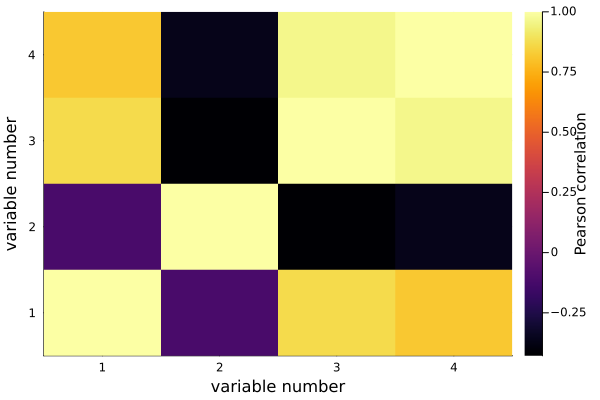

In [16]:
heatmap(c,xlabel = "variable number" , ylabel = "variable number", colorbar_title = "Pearson correlation")

## E24:

What are the two variables that you would merge to one?

> **Answer to E24** 
>
> For example the variables 3 and 4 are too similar to each other.
> 

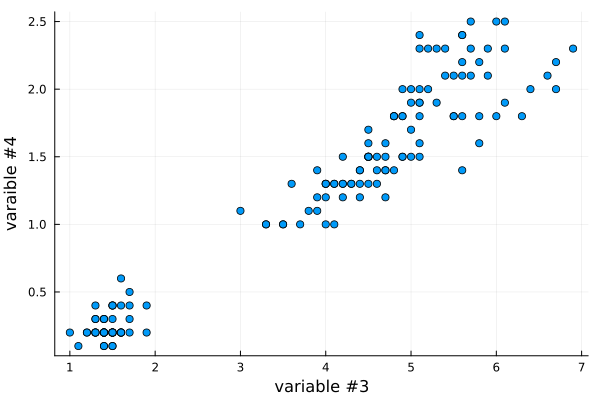

In [17]:
scatter(data_m[:,3],data_m[:,4],label=false)
xlabel!("variable #3")
ylabel!("varaible #4")

## E25: 

Between the two variable which one would you select for a potential model?

> **Answer to E25** 
>
> The variable with the largest variance should be selected for this.

## E26:

Write a function to perform hot-deck imputation? 

## E27: 

Write a function to select the variables that are too similar to each other and remove the redundant ones.